In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [50]:
data = pd.read_csv("Bank",sep=',')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


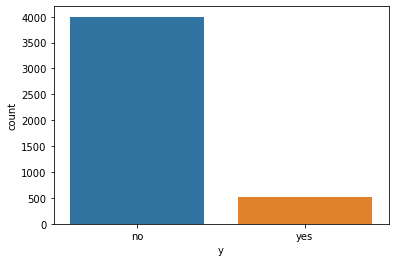

In [51]:
sns.countplot(x='y',data=data)

In [52]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [53]:
print(data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [55]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data.iloc[:,1]=le.fit_transform(data.iloc[:,1])
data.iloc[:,2]=le.fit_transform(data.iloc[:,2])
data.iloc[:,3]=le.fit_transform(data.iloc[:,3])
data.iloc[:,4]=le.fit_transform(data.iloc[:,4])
data.iloc[:,6]=le.fit_transform(data.iloc[:,6])
data.iloc[:,7]=le.fit_transform(data.iloc[:,7])
data.iloc[:,8]=le.fit_transform(data.iloc[:,8])
data.iloc[:,10]=le.fit_transform(data.iloc[:,10])
data.iloc[:,-2]=le.fit_transform(data.iloc[:,-2])
data.iloc[:,-1]=le.fit_transform(data.iloc[:,-1])

In [56]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


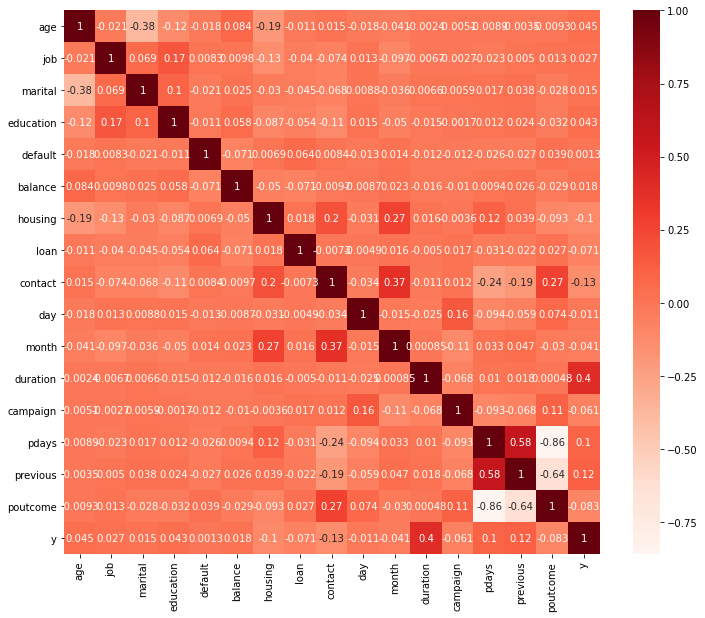

                age       job   marital  education   default   balance  \
age        1.000000 -0.021500 -0.381485  -0.121613 -0.017885  0.083820   
job       -0.021500  1.000000  0.069390   0.170160  0.008324  0.009797   
marital   -0.381485  0.069390  1.000000   0.102714 -0.020745  0.024971   
education -0.121613  0.170160  0.102714   1.000000 -0.010534  0.057725   
default   -0.017885  0.008324 -0.020745  -0.010534  1.000000 -0.070886   
balance    0.083820  0.009797  0.024971   0.057725 -0.070886  1.000000   
housing   -0.193888 -0.128353 -0.029851  -0.087070  0.006881 -0.050227   
loan      -0.011250 -0.040245 -0.045210  -0.054086  0.063994 -0.071349   
contact    0.015161 -0.074068 -0.068236  -0.110554  0.008448 -0.009665   
day       -0.017853  0.012865  0.008794   0.014926 -0.013261 -0.008677   
month     -0.040714 -0.096613 -0.035855  -0.050086  0.014297  0.023113   
duration  -0.002367 -0.006739  0.006619  -0.014878 -0.011615 -0.015950   
campaign  -0.005148 -0.002739  0.00591

In [57]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
print(cor)

In [58]:
X = data.iloc[:,:-1]  
y = data.iloc[:,-1]

In [59]:
from sklearn.preprocessing import MinMaxScaler
minmaxer = MinMaxScaler(feature_range=(1,10))
minmaxed_x = minmaxer.fit_transform(X)

In [60]:
from sklearn.feature_selection import chi2
chi_value,pval = chi2(minmaxed_x,y)
pval = np.round(pval,decimals=3)
with np.printoptions(precision=4,suppress=True):
 print(pd.DataFrame(np.concatenate((chi_value.reshape(-1,1),pval.reshape(-1,1)),axis=1),
 index = data.columns[:-1],columns=['chi2 val','pval']))

             chi2 val   pval
age          4.577160  0.032
job          5.224402  0.022
marital      1.207917  0.272
education    8.977732  0.003
default      0.008921  0.925
balance      0.121844  0.727
housing    161.754667  0.000
loan        99.253458  0.000
contact    337.362533  0.000
day          0.639072  0.424
month        8.261781  0.004
duration   245.622256  0.000
campaign     4.147487  0.042
pdays       36.805583  0.000
previous    19.147307  0.000
poutcome    31.502855  0.000


In [70]:
x = data.drop(columns=['marital','day','default','balance']).values
y = data['y'].values

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [72]:
from sklearn.model_selection import StratifiedShuffleSplit
def train_val_splitter(x,y):
 splitter = StratifiedShuffleSplit(n_splits=1,test_size=0.1,random_state=101)
 for train_ind,val_ind in splitter.split(x,y):
  xtrain = x[train_ind];xval = x[val_ind]
  ytrain = y[train_ind];yval = y[val_ind]
 return xtrain,xval,ytrain,yval
xtrain,xval,ytrain,yval = train_val_splitter(x,y)

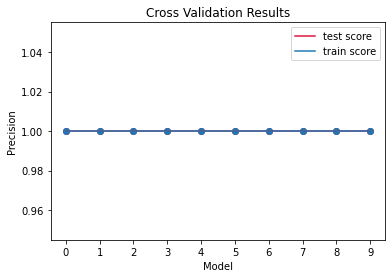

SVC(kernel='linear', probability=True)

In [73]:
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
lin_svm = SVC(kernel='linear',probability=True)
splitter = StratifiedShuffleSplit(n_splits=10,random_state=101,test_size=0.2)
cv = cross_validate(estimator=lin_svm,X=xtrain,y=ytrain,cv=splitter,n_jobs=-1,scoring='precision',
 return_estimator=True,return_train_score=True)
plt.plot(range(len(cv['test_score'])),cv['test_score'],label='test score',color='crimson')
plt.plot(range(len(cv['train_score'])),cv['train_score'],label='train score')
plt.scatter(range(len(cv['test_score'])),cv['test_score'],color='crimson')
plt.scatter(range(len(cv['train_score'])),cv['train_score'])
plt.xlabel('Model')
plt.ylabel('Precision')
plt.xticks(range(len(cv['test_score'])))
plt.legend()
plt.title('Cross Validation Results')
plt.show()
best_lin_svm = cv['estimator'][0]
best_lin_svm

In [74]:
from sklearn.model_selection import RandomizedSearchCV
params={'C':np.arange(1,5)}
tuner = RandomizedSearchCV(estimator=best_lin_svm,param_distributions=params,n_jobs=-1,scoring='precision',
 cv=splitter,random_state=101,return_train_score=True,)
tuner.fit(xtrain,ytrain)
print("Hyper Parameter Tuning Results")
print("Best Params : ",tuner.best_params_)
print("Best Score : ",tuner.best_score_)
print("Best Model : ",tuner.best_estimator_)
best_lin_svm = tuner.best_estimator_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Hyper Parameter Tuning Results
Best Params :  {'C': 1}
Best Score :  1.0
Best Model :  SVC(C=1, kernel='linear', probability=True)


CLASSIFICATION REPORT OF VALIDATION DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00        52

    accuracy                           1.00       453
   macro avg       1.00      1.00      1.00       453
weighted avg       1.00      1.00      1.00       453

CONFUSION MATRIX OF VALIDATION DATA
[[401   0]
 [  0  52]]
Acuuracy :  1.0
AUC score :  1.0


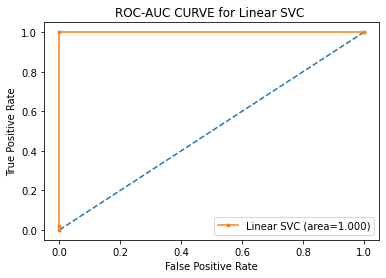

In [75]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve
ypred = best_lin_svm.predict(xval)
ytrue = yval
print("CLASSIFICATION REPORT OF VALIDATION DATA")
print(classification_report(ytrue,ypred))
print("CONFUSION MATRIX OF VALIDATION DATA")
conf_mat = confusion_matrix(ytrue,ypred)
print(conf_mat)
print("Acuuracy : ",(conf_mat[0][0]+conf_mat[1][1])/len(ytrue))
probs = best_lin_svm.predict_proba(xval)[:,1]
fpr,tpr,_ = roc_curve(yval,probs)
random_probs = [0 for i in range(len(yval))]
p_fpr,p_tpr,_ = roc_curve(yval,random_probs)
auc_score = roc_auc_score(yval,probs)
print("AUC score : ",auc_score)
plt.plot(p_fpr, p_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Linear SVC (area=%0.3f)'% auc_score)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC-AUC CURVE for Linear SVC ")
plt.legend()
plt.show()

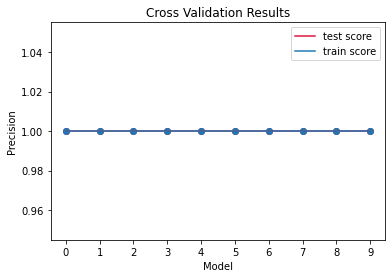

SVC(probability=True)

In [76]:
rbf_svm = SVC(kernel='rbf',probability=True)
splitter = StratifiedShuffleSplit(n_splits=10,random_state=101,test_size=0.2)
cv = cross_validate(estimator=rbf_svm,X=xtrain,y=ytrain,cv=splitter,n_jobs=-1,scoring='precision',
 return_estimator=True,return_train_score=True)
plt.plot(range(len(cv['test_score'])),cv['test_score'],label='test score',color='crimson')
plt.plot(range(len(cv['train_score'])),cv['train_score'],label='train score')
plt.scatter(range(len(cv['test_score'])),cv['test_score'],color='crimson')
plt.scatter(range(len(cv['train_score'])),cv['train_score'])
plt.xlabel('Model')
plt.ylabel('Precision')
plt.xticks(range(len(cv['test_score'])))
plt.legend()
plt.title('Cross Validation Results')
plt.show()
best_rbf_svc = cv['estimator'][1]
best_rbf_svc

In [77]:
params={'C':np.arange(1,5)}
tuner = RandomizedSearchCV(estimator=best_rbf_svc,param_distributions=params,n_jobs=-1,scoring='precision',
 cv=splitter,random_state=101,return_train_score=True,)
tuner.fit(xtrain,ytrain)
print("Hyper Parameter Tuning Results")
print("Best Params : ",tuner.best_params_)
print("Best Score : ",tuner.best_score_)
print("Best Model : ",tuner.best_estimator_)
best_rbf_svc = tuner.best_estimator_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Hyper Parameter Tuning Results
Best Params :  {'C': 1}
Best Score :  1.0
Best Model :  SVC(C=1, probability=True)


CLASSIFICATION REPORT OF VALIDATION DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00        52

    accuracy                           1.00       453
   macro avg       1.00      1.00      1.00       453
weighted avg       1.00      1.00      1.00       453

CONFUSION MATRIX OF VALIDATION DATA
[[401   0]
 [  0  52]]
Acuuracy :  1.0
AUC score :  1.0


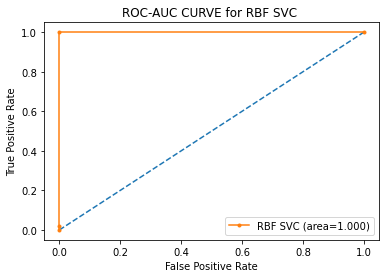

In [78]:
ypred = best_rbf_svc.predict(xval)
ytrue = yval
print("CLASSIFICATION REPORT OF VALIDATION DATA")
print(classification_report(ytrue,ypred))
print("CONFUSION MATRIX OF VALIDATION DATA")
conf_mat = confusion_matrix(ytrue,ypred)
print(conf_mat)
print("Acuuracy : ",(conf_mat[0][0]+conf_mat[1][1])/len(ytrue))
probs = best_rbf_svc.predict_proba(xval)[:,1]
fpr,tpr,_ = roc_curve(yval,probs)
random_probs = [0 for i in range(len(yval))]
p_fpr,p_tpr,_ = roc_curve(yval,random_probs)
auc_score = roc_auc_score(yval,probs)
print("AUC score : ",auc_score)
plt.plot(p_fpr, p_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='RBF SVC (area=%0.3f)'% auc_score)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC-AUC CURVE for RBF SVC ")
plt.legend()
plt.show()